# やること

# 関数作成
## (X,t)を作る。
## $\phi_0,...,\phi_{M-1}$を作る。
e.g. $\phi_0(x)=1, \phi_1(x)=x, \phi_2(x)=x^2,\ldots$
## $\Phi$を計算する
## $\omega$を計算する

# Cross-Validation

## (X,t)をK分割する。
## それぞれの分割kについて以下をやる。
    ### k番目以外を使って関数を作る。
    ### k番目を使って
1. $(x,t)$ をプロット
2. $(x,\omega \phi(x))$をプロット
3.2乗誤差 $|\omega \phi(x)-t|^2$とRMS(Root mean squre) $\sqrt{ \sum_n |\omega \phi(x_n)-t_n|^2 /N_k}$を計算して評価.

In [2]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# データセット生成

In [10]:
xy_min = -1
xy_max = 1
n_division = 10#100#10

x = np.linspace(xy_min, xy_max, n_division+1)

#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。
X=np.meshgrid(x,x)
t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]+np.sin(X[1])**2 *np.cos(X[0])*X[1]**(5)

num_data=X[0].size

In [4]:
#ノイズのあるデータの生成

#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布
standard_deviation =0.8; .1 #0.8 #0.1
mean = .0
normal_random_generator = np.random.normal

t_noised=t+ normal_random_generator(mean, standard_deviation,X[0].shape)

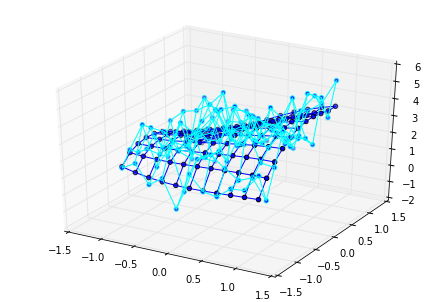

In [6]:
#ノイズの無し／有りデータの表示

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

ax.scatter(X[0],X[1],t_noised,color='cyan') #<---ここでplot
ax.plot_wireframe(X[0],X[1],t_noised,color='cyan') #<---ここでplot

In [7]:
#グリッドデータを点列データとする

x_array=np.reshape(X[0],np.size(X[0]))
y_array=np.reshape(X[1],np.size(X[1]))
t_array=np.reshape(t,np.size(t))
t_noised_array=np.reshape(t_noised,np.size(t))

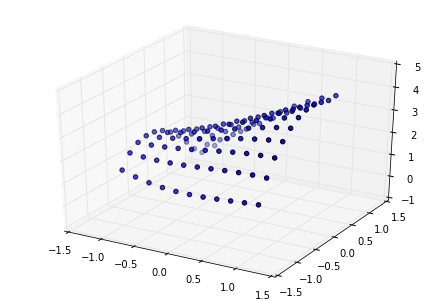

In [8]:
#点列データの表示（上と同様、wireframe は繋がる）

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_array,y_array,t_array) #<---ここでplot

# 基底関数の生成

In [11]:
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
phi_05 =lambda a,b : b**5
phi_sin_x= lambda a,b: np.sin(a)
phi_sin_y= lambda a,b: np.sin(b)
phi_cos_x= lambda a,b: np.cos(a)
phi_cos_y= lambda a,b: np.cos(b)
phi_05_sin_y2_cos_x = lambda a,b:b**5* np.sin(a)**2 *np.cos(b)

phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
num_func=len(phi)

In [12]:
#Φの生成

PHI = np.zeros((num_data, num_func))

#関数Φ（行：サンプル数,列：基底関数の個数）の各要素に値を入れる
for i,ph in enumerate(phi):
    PHI[:,i] = np.reshape(ph(X[0],X[1]),X[0].size)

# トレーニング

In [15]:
#重みwを求める

PHI_trans=np.transpose(PHI)
w = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_array))
#np.linalg.inv 逆行列を求める 
#ws = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_array))
#solve:方程式の解
print w
#print ws

[  2.98619644e+00   8.86201157e-01   3.16674591e-01   7.99360578e-15
   1.00000000e+00  -1.37893810e+00]


## Training with noise

In [31]:
PHI_trans=np.transpose(PHI)
#np.transpose 転置
w_noise = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_noised_array))
ws_noise = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_noised_array))
print w_noise
print ws_noise

[ 2.92757771  1.07063837  0.1991112   0.17133337  0.87842911 -1.44265563]
[ 2.92757771  1.07063837  0.1991112   0.17133337  0.87842911 -1.44265563]


# Prediction

In [32]:
x_sample=(X[0][0,0],X[1][0,0])
y_sample=sum ([ phi[i](*x_sample) for i in xrange(len(phi)) ])

Y_predicted_array=PHI.dot(w)

print Y_predicted_array

Y_predicted=Y_predicted_array.reshape(X[0].shape)



Y_predicted_from_noise_array=PHI.dot(w_noise)
Y_predicted_noise=Y_predicted_from_noise_array.reshape(X[0].shape)


[ 1.40438259  1.38162282  1.35886306  1.33610329  1.31334352  1.29058375
  1.26782398  1.24506421  1.22230444  1.19954468  1.17678491  1.76413523
  1.78137546  1.79861569  1.81585592  1.83309615  1.85033638  1.86757662
  1.88481685  1.90205708  1.91929731  1.93653754  2.01357281  2.07081305
  2.12805328  2.18529351  2.24253374  2.29977397  2.3570142   2.41425443
  2.47149466  2.5287349   2.58597513  2.15269535  2.24993558  2.34717581
  2.44441605  2.54165628  2.63889651  2.73613674  2.83337697  2.9306172
  3.02785743  3.12509767  2.18150284  2.31874307  2.45598331  2.59322354
  2.73046377  2.867704    3.00494423  3.14218446  3.27942469  3.41666492
  3.55390516  2.09999528  2.27723552  2.45447575  2.63171598  2.80895621
  2.98619644  3.16343667  3.3406769   3.51791714  3.69515737  3.8723976
  1.90817268  2.12541291  2.34265314  2.55989337  2.7771336   2.99437384
  3.21161407  3.4288543   3.64609453  3.86333476  4.08057499  1.60603502
  1.86327526  2.12051549  2.37775572  2.63499595  2.8

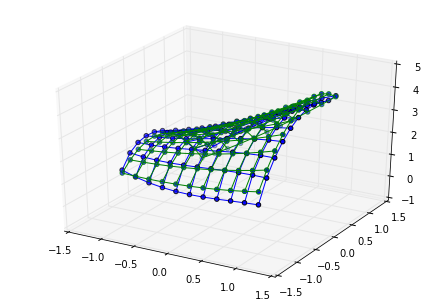

In [33]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

# ax.plot_wireframe(X[0],X[1],t_noised) #<---ここでplot
# ax.scatter(X[0],X[1],t_noised) #<---ここでplot


# ax.scatter(X[0],X[1],Y_predicted,color='red') #<---ここでplot
# ax.plot_wireframe(X[0],X[1],Y_predicted,color='red') #<---ここでplot

ax.scatter(X[0],X[1],Y_predicted_noise,color='green') #<---ここでplot
ax.plot_wireframe(X[0],X[1],Y_predicted_noise,color='green') #<---ここでplot



# ax.scatter(X[0],X[1],t_noised,color='cyan') #<---ここでplot
# ax.plot_wireframe(X[0],X[1],t_noised,color='cyan') #<---ここでplot

In [34]:
p=(3,4)
phi_p=[0]*len(phi)
for i, ph in enumerate (phi):
    phi_p[i]=ph(*p)
#enumerate：インデックスとともにループ

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
phi_p

In [ ]:
tuple(p)

In [ ]:
some_list=[0]*5

In [ ]:
some_list